### 다중회귀, 다항회귀
다중회귀
- 특성 여러 개 인 것들, 변수가 2개 이상 되고 3개, 4개 이상 되면


다항회귀
- 차수를 높이는 개념
- 다항회귀도 선형회귀라고 말을 한다.
- 2차 3차 방정식으로 표현되는데, 치환을 통해서 하나의 선형적인 회귀 식으로 만들 수 있다.
- 선현/비선형을 나눌 때는 회귀 계수에 따라서 선형인지 비선형인지를 나누게 되는 것

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [2]:
boston = pd.read_csv("boston_house.csv")

In [3]:
boston

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,69.1,391.99,6.593,0.06263,2.4786,11.93,9.67,0.573,21.0,1,0.0,273,0,22.4
502,76.7,396.90,6.120,0.04527,2.2875,11.93,9.08,0.573,21.0,1,0.0,273,0,20.6
503,91.0,396.90,6.976,0.06076,2.1675,11.93,5.64,0.573,21.0,1,0.0,273,0,23.9
504,89.3,393.45,6.794,0.10959,2.3889,11.93,6.48,0.573,21.0,1,0.0,273,0,22.0


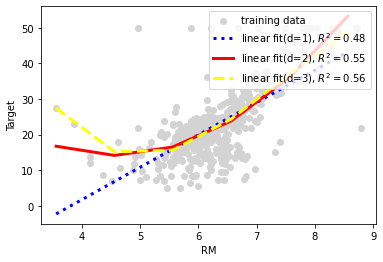

In [4]:
X = np.array(boston["RM"])
y = np.array(boston["Target"])
X = X.reshape(-1,1)
y = y.reshape(-1,1)

lr = LinearRegression()

# 다항회귀
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)

X_quad = quadratic.fit_transform(X)
X_cubic = cubic.fit_transform(X)

# 단순회귀식 계산
X_fit = np.arange(X.min(), X.max(), 1)[:, np.newaxis]
lr.fit(X,y)
y_lin_fit = lr.predict(X_fit)
l_r2 = r2_score(y, lr.predict(X))

# 2차 다항회귀 모델
lr.fit(X_quad, y)
y_quad_fit = lr.predict(quadratic.fit_transform(X_fit))
q_r2 = r2_score(y, lr.predict(X_quad))

# 3차 다항회귀 모델
lr.fit(X_cubic, y)
y_cubic_fit = lr.predict(cubic.fit_transform(X_fit))
c_r2 = r2_score(y, lr.predict(X_cubic))

# 그래프 그리기
plt.scatter(X, y, label="training data", c="lightgray")
plt.plot(X_fit, y_lin_fit, linestyle=":", label="linear fit(d=1), $R^2=%.2f$" %l_r2, c="blue", lw=3)
plt.plot(X_fit, y_quad_fit, linestyle="-", label="linear fit(d=2), $R^2=%.2f$" %q_r2, c="red", lw=3)
plt.plot(X_fit, y_cubic_fit, linestyle="--", label="linear fit(d=3), $R^2=%.2f$" %c_r2, c="yellow", lw=3)

plt.ylabel("Target")
plt.xlabel("RM")
plt.legend(loc=1)
plt.show()

- 과적합이 될 수 있다.
- 조심해야 한다.

- 다항회귀가 변하는 방식

In [5]:
X = np.arange(4).reshape(2,2)
print("1차 단항식의 계수 피쳐", X)

# 2차 3차로 바뀌는 방식이 무엇인지를 이해해 보면
# 2차 다항식
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X)
print("변환된 2차 다항식 계수", poly_ftr)

1차 단항식의 계수 피쳐 [[0 1]
 [2 3]]
변환된 2차 다항식 계수 [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


- 단항식 [X1, X2]
- 2차 다항식으로 바꾸는 방법 : 기존의 단항식을 가지고 다항계수를 만든다.
- [1, X1, X2, X1 ** 2, X1 * X2, X2 ** 2]

### 필수과제1
- 3차 다항식을 만들고 -> 원리를 주석으로 간단하게 정리해 주세요!

- 다항회귀는 피처의 직선관계가 아닌 복잡한 다항관계를 모델링 가능
- 다항식의 차수가 높아질수록 복잡한 피쳐 간의 관계를 모델링이 가능하다.
- 하지만 다항회귀 차수가 높을수록 학습데이터에만 너무 맞춰진 학습 -> 정작 테스트에서는 오히려 정확도가 떨어질 수 있다.
- 즉, 차수가 높아질수록 과적합 문제가 발생할 수 있다.

In [6]:
import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
%matplotlib inline

In [7]:
# 임의의 값으로 구성된 X의 값에 대해 코사인 변환 값을 반환
def true_func(X):
    return np.cos(1.5*np.pi*X)

# X는 0부터 1까지 30개 임의의 값을 순서대로 샘플링한 데이터
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y값은 코사인 기반의 true_func()에서 노이즈 변동 값을 더한 값
y = true_func(X) + np.random.randn(n_samples)*0.1

Degree 1 회귀 계수는 [-1.61] 입니다.
Degree 1 MSE는 0.40772896250986845 입니다.
Degree 4 회귀 계수는 [  0.47 -17.79  23.59  -7.26] 입니다.
Degree 4 MSE는 0.043208749872317626 입니다.
Degree 15 회귀 계수는 [-2.98292000e+03  1.03899180e+05 -1.87415809e+06  2.03715961e+07
 -1.44873157e+08  7.09315008e+08 -2.47065753e+09  6.24561150e+09
 -1.15676562e+10  1.56895047e+10 -1.54006170e+10  1.06457389e+10
 -4.91378211e+09  1.35919860e+09 -1.70381087e+08] 입니다.
Degree 15 MSE는 182493841.77304456 입니다.


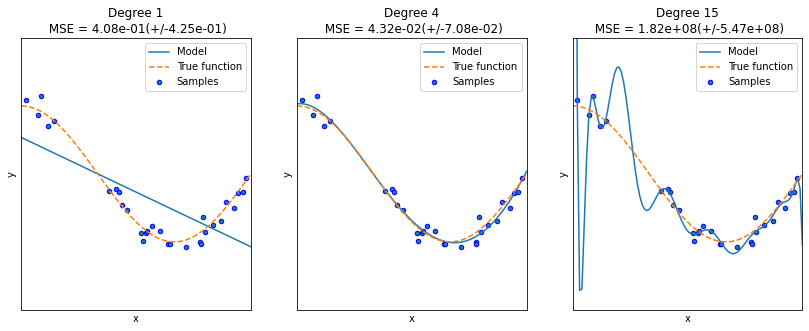

In [8]:
plt.figure(figsize=(14,5))
degrees = [1, 4, 15]

# 다항회귀의 차수 degree를 변화시키면서 비교
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i+1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 polynomial 변환
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features), 
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1,1), y)
    
    # 교차 검증으로 다항 회귀 평가
    scores = cross_val_score(pipeline, X.reshape(-1,1), y, scoring="neg_mean_squared_error", cv=10)
    
    # Pipeline을 구성하는 세부 객체 named_steps 이용해 회귀 계수 추출
    coefficients = pipeline.named_steps["linear_regression"].coef_
    print("Degree {0} 회귀 계수는 {1} 입니다.".format(degrees[i], np.round(coefficients, 2)))
    print("Degree {0} MSE는 {1} 입니다.".format(degrees[i], -1*np.mean(scores)))
    
    # 0부터 1까지 테스트 데이터를 100개로 나눠서 예측 수행
    # 테스트 데이터 세트에서 회귀 예측 후 예측 곡선과 실제 곡선을 그려서 비교
    X_test = np.linspace(0,1,100)
    
    ## 예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    
    ## 실제값 곡선
    plt.plot(X_test, true_func(X_test), "--", label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0,1))
    plt.ylim((-2,2))
    plt.legend(loc="best")
    plt.title("Degree {}\n MSE = {:.2e}(+/-{:.2e})".format(degrees[i], -scores.mean(), scores.std()))

plt.show()

- 좋은 예측 모델은 너무 설명하지 못하는 것도 아니고 (과소적합), 과적합도 아닌 적절한 수준의 밸런스가 필요하다.
- 1차를 설명력이 높다 볼 수 없고, 15차를 과적합이 된 것으로 보임 -> 4차 정도 수준에서 놓치는 부분은 있지만 과적합되지 않고 최대한 잘 설명하고 있음

### 규제
- 선형회귀분석을 통해서 실제값과 예측값에 대한 차이를 MSE, RMSE를 가지고 최적의 모델을 찾기 위해 노력했다.
- 최대한 선형 모델의 비용함수 값이 가장 낮은(최소화) 값을 찾기 위해서 노력했는데, 이런 경우 문제가 발생할 수 있다.
- 학습 데이터에 지나치게 맞추게 되면, 회귀 계수 값이 매우 커진다.
- 이런 경우는 오히려 실제 테스트 데이터의 성능이 저하될 수 있기 때문에 이 부분을 방지하기 위해서 규제를 가한다.


- 회귀분석에서 생각하는 비용함수
- 비용함수 = 학습 데이터 잔차의 오류를 최소화 + 회귀계수의 크기를 제어하는 것
- 규제라는 것이
- 비용함수 = Min(RSS(W)) + alpha*||W||
- 우리가 전에 배웠던 것은 Min(RSS(W)): 최소화하는 것
- 지금 배우는 규제는 alpha*||W|| 회귀계수에 대한 규제


- alpha: 흔히 말하는 학습 데이터 적합 정도와 회귀계수 크기를 제어하는 파라미터 (튜닝)
- 최적의 최소화를 할 수 있는 W 벡터를 찾는 것이다.
- alpha * W
- 최소화하기 위해서는
- 1) alpha 값이 작은 값으면 (규제 없이) 최소화되는 것
- 2) alpha 값이 큰 값이라면 W 값을 작은 값으로 조정하면서 최소화 되는 것
- 비용함수에 alpha 값으로 패널티를 부여해서 회귀 계수의 값의 크기를 감소시켜 과소적합하는 빙식이 규제


- L2, L1 방식
- L2는 W의 제곱에 패널티를 부여하는 방식 -> 릿지
- L1은 W의 절댓값에 패널티를 부여하는 방식 -> 라쏘
- L1+L2 형식으로 합쳐진 것이 엘라스틱넷

### 릿지 회귀
- W의 제곱에 패널티를 부여한다.
- L2 선형회귀 규제 방식
- 회귀계수의 값이 절대 0이 되지 않는다.

In [9]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import seaborn as sns
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn import datasets

In [12]:
# 데이터 분할
y = np.array(boston["Target"])
X = boston.drop(["Target"], axis=1, inplace=False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=111)

# 회귀식
lr = LinearRegression()
lr.fit(X_train, y_train)
y_preds = lr.predict(X_test)
mse = mean_squared_error(y_test, y_preds)
lr_rmse = np.sqrt(mse)

# 일반 cross validation
lr_neg_mse_scores = cross_val_score(lr, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
lr_rmse_scores = np.sqrt(-1*lr_neg_mse_scores)
lr_avg_rmse = np.mean(lr_rmse_scores)

# 릿지 (alpha=10)
ridge = Ridge(alpha=10)
neg_mse_scores = cross_val_score(ridge, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
rmse_scores = np.sqrt(-1*neg_mse_scores)
avg_rmse = np.mean(rmse_scores)

print("선형회귀", lr_avg_rmse)
print("릿지", avg_rmse)

선형회귀 4.965745258103665
릿지 5.006266011302501


In [13]:
# alpha 파라미터 값을 조정해서 바꿔보자
alphas = [0, 0.1, 1, 10, 100]

# alpha 리스트 평균 rmse
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    
    # cross val score cv=5 RMSE
    neg_mse_scores = cross_val_score(ridge, X_train, y_train, scoring="neg_mean_squared_error", cv=5)
    avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
    print("alpha {0}일 때 5 folds의 평균 RMSE : {1:.3f}".format(alpha, avg_rmse))

alpha 0일 때 5 folds의 평균 RMSE : 4.966
alpha 0.1일 때 5 folds의 평균 RMSE : 4.966
alpha 1일 때 5 folds의 평균 RMSE : 4.984
alpha 10일 때 5 folds의 평균 RMSE : 5.006
alpha 100일 때 5 folds의 평균 RMSE : 5.071


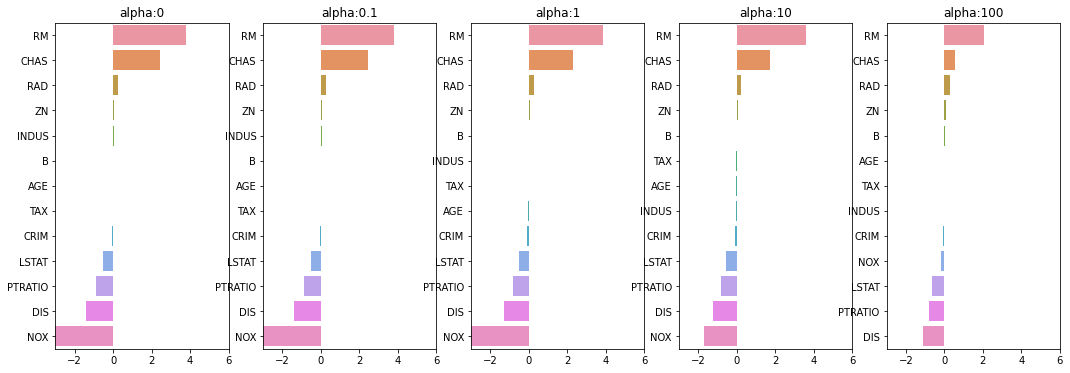

In [15]:
# 각 alpha에 따른 회귀계수 값을 시각화하기 위해 5개 열로 된 matplotlib 축 생성
fig, axs = plt.subplots(figsize=(18,6), nrows=1, ncols=5)

# 각 alpha에 따른 회귀계수 값을 데이터로 저장하는 데이터 프레임
coeff_df = pd.DataFrame()

# alphas 리스트 값을 차례로 입력해 회귀계수 값 시각화 및 데이터 저장
for pos, alpha in enumerate(alphas):
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train, y_train)
    
    # alpha에 따라 피처별로 회귀계수를 Series로 변환하고 이를 DataFrame의 컬럼으로 추가
    coeff = pd.Series(data=ridge.coef_, index=X_train.columns)
    colname = "alpha:" + str(alpha)
    coeff_df[colname] = coeff
    
    # 막대 그래프로 각 alpha 값에서의 회귀계수를 시각화, 회귀계수 값이 높은 순으로 표현
    coeff = coeff.sort_values(ascending=False)
    axs[pos].set_title(colname)
    axs[pos].set_xlim(-3,6)
    sns.barplot(x=coeff.values, y=coeff.index, ax=axs[pos])

In [16]:
ridge_alphas = [0, 0.1, 1, 10, 100]
sort_columns = "alpha:" + str(ridge_alphas[0])
coeff_df.sort_values(by=sort_columns, ascending=False)

,alpha:0,alpha:0.1,alpha:1,alpha:10,alpha:100
RM,3.808368,3.818017,3.849444,3.612711,2.042059
CHAS,2.452340,2.434932,2.318485,1.739668,0.557144
RAD,0.274837,0.271036,0.253331,0.244921,0.287957
ZN,0.051475,0.051368,0.050949,0.052115,0.057974
INDUS,0.039759,0.034274,0.007804,-0.020697,-0.026732
B,0.010848,0.010942,0.011393,0.011740,0.010656
AGE,-0.008769,-0.009893,-0.015209,-0.018881,-0.005857
TAX,-0.012074,-0.012137,-0.012473,-0.013367,-0.015218
CRIM,-0.074834,-0.073915,-0.069648,-0.067775,-0.077626
LSTAT,-0.514497,-0.515804,-0.523297,-0.551684,-0.663934


- alpha 값이 증가하면서 회귀계수가 지속적으로 작아지고 있는 것
- 하지만 릿지 회귀계수를 0으로 만들지는 않는다.
- 회귀계수를 0으로 만든다는 것은 결국 그 변수를 뺀다는 것 (cf. 라쏘는 0으로 만든다.)

### 라쏘 회귀
- W의 절댓값에 패널티를 부여한다.
- L1 선형회귀 규제 방식
- 불필요한 변수는 회귀계수를 급격하게 0으로 만들어서 제거시킨다.

In [17]:
from sklearn.linear_model import Lasso, ElasticNet

# alpha 값을 따른 회귀 모델의 폴드 평균 RMSE를 출력하고 회귀계수 값들을 DF 변환
def get_linear_reg_eval(model_name, params=None, X_data_n=None, y_target_n=None, 
                        verbose=True, return_coeff=True):
    coeff_df = pd.DataFrame()
    if verbose:
        print("######", model_name, "######")
    for param in params:
        if model_name == "Ridge":
            model = Ridge(alpha=param)
        elif model_name == "Lasso":
            model = Lasso(alpha=param)
        elif model_name == "ElasticNet":
            model = ElasticNet(alpha=param, l1_ratio=0.7)
        neg_mse_scores = cross_val_score(model, X_data_n, y_target_n, 
                                         scoring="neg_mean_squared_error", cv=5)
        avg_rmse = np.mean(np.sqrt(-1*neg_mse_scores))
        print("alpha {0}일 때 5 폴드 세트의 평균 RMSE : {1:.3f}".format(param, avg_rmse))
        
        # cross_val_score는 evaluation metric만 반환하므로 모델을 다시 학습하여 회귀계수 추출
        model.fit(X_data_n, y_target_n)
        if return_coeff:
            # alpha에 따른 피처별 회귀계수를 Series로 변환하고 이를 DataFrame 컬럼으로 추가
            coeff = pd.Series(data=model.coef_, index=X_data_n.columns)
            colname = "alpha:" + str(param)
            coeff_df[colname] = coeff
    return coeff_df

In [18]:
# 라쏘에 사용될 alpha 파라미터 값 정의
lasso_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_lasso_df = get_linear_reg_eval("Lasso", params=lasso_alphas, X_data_n=X_train, y_target_n=y_train)

###### Lasso ######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE : 5.050
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.047
alpha 0.5일 때 5 폴드 세트의 평균 RMSE : 5.063
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.312
alpha 3일 때 5 폴드 세트의 평균 RMSE : 5.857


In [19]:
# 반환된 coeff_lasso_df를 첫 번째 컬럼 순으로 내림차순 정렬해 회귀계수 DF 출력
sort_column = "alpha:" + str(lasso_alphas[0])
coeff_lasso_df.sort_values(by=sort_column, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.773837,3.686930,2.365530,0.724296,0.000000
CHAS,1.327519,0.892495,0.000000,0.000000,0.000000
RAD,0.234742,0.239303,0.239361,0.224885,0.042215
ZN,0.050790,0.051211,0.051336,0.049171,0.031078
B,0.012064,0.012062,0.011082,0.009705,0.007720
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
TAX,-0.013564,-0.013912,-0.014159,-0.013457,-0.006660
INDUS,-0.015733,-0.009348,-0.000000,-0.000000,-0.000000
AGE,-0.019998,-0.018498,-0.002272,0.010116,0.026390
CRIM,-0.062218,-0.062068,-0.048879,-0.029694,-0.000000


### 엘라스틱넷 회귀
- L2 규제 + L1 규제 결합해 최소화하는 것
- 라쏘 회귀가 서로 상관관계가 높은 피처 중 중요한 피처만 선택하고 나머지는 0으로 만듦
- 이런 성향은 alpha 값에 따라 회귀계수가 급변동할 수 있는데, 이를 완화하기 위해 L2 규제를 함께 사용

In [20]:
# 엘라스틱넷에 사용될 alpha 파라미터 값을 정의하고 함수 도출
# l1_ratio는 0.7로 고정
elastic_alphas = [0.07, 0.1, 0.5, 1, 3]
coeff_elastic_df = get_linear_reg_eval("ElasticNet", params=elastic_alphas, 
                                       X_data_n=X_train, y_target_n=y_train)

###### ElasticNet ######
alpha 0.07일 때 5 폴드 세트의 평균 RMSE : 5.029
alpha 0.1일 때 5 폴드 세트의 평균 RMSE : 5.027
alpha 0.5일 때 5 폴드 세트의 평균 RMSE : 5.092
alpha 1일 때 5 폴드 세트의 평균 RMSE : 5.257
alpha 3일 때 5 폴드 세트의 평균 RMSE : 5.729


In [21]:
sort_columns = "alpha:" + str(elastic_alphas[0])
coeff_elastic_df.sort_values(by=sort_columns, ascending=False)

,alpha:0.07,alpha:0.1,alpha:0.5,alpha:1,alpha:3
RM,3.542407,3.373660,1.814472,0.832027,0.000000
CHAS,1.264424,0.947394,0.000000,0.000000,0.000000
RAD,0.242815,0.248657,0.268553,0.248960,0.113653
ZN,0.052149,0.052897,0.055578,0.051957,0.032290
B,0.011872,0.011779,0.010610,0.009758,0.008523
NOX,-0.000000,-0.000000,-0.000000,-0.000000,0.000000
TAX,-0.013783,-0.014102,-0.015224,-0.014384,-0.009190
AGE,-0.018629,-0.016791,-0.000000,0.009266,0.028047
INDUS,-0.019680,-0.016242,-0.000000,-0.000000,-0.000000
CRIM,-0.065232,-0.065836,-0.060007,-0.044251,-0.000000


- 그러면 어떤 걸 사용해야 하나?
- 릿지냐, 라쏘냐, 엘라스틱넷이냐? 무엇을 사용해 하는가?
- 정답은 없다. 어떤 게 특별히 좋은 건 아니다.
- 결론적으로 다 비교를 해보면서 가장 좋은 모델을 선택해야 하는 것이 맞고, 규제하는 방식이기 때문에 이 모델을 사용하면서 무엇을 얻게 되고 어떤 식으로 작동하는지 이해하셔야 한다.
- alpha 값에 따라서 비교하면서 적절한 모델을 찾으면 된다. 예측 성능은 RMSE를 확인하면서 적절한 모델을 선택해야 한다.

### 필수과제2
- 데이터를 제공할 예정
- 해당 데이터를 가지고 기존에 배웠던, OLS~ 변수에 대한 설명령 이해 이런 부분에다가 추가로 오늘 배운 내용까지 해서 최적의 모델링, alpha 값까지 찾아서
- 정리해서 제출해주세요!